<h1 align="center">Topic 1: HASH FUNCTIONS</h1>
<h3 align="center">UMBC DATA690 - Data Structures and Algorithms</h3>
<h4 align="center">Spring 2025</h4>
<h4 align="right">Dr. Ajinkya Borle</h4>
<h4 align="left">Pavan Kumar Kollipara (XK77497)</h4>
<h4 align="left">Sairam Prudhvi Karri (BA13810)</h4>
<h4 align="left">Monika Alla (RS82696)</h4>
<h4 align="left">Srija Adapa (UG87574)</h4>

---

<h1 align="center">Project Agenda: Hashing Plain Text Passwords</h1>

1. **Dataset (Synthetic Data)** 
   - Generate a dataset of 1000 synthetic users.  
   - Each user entry will include:  
     - Name  
     - Email address  
     - Plaintext password  

2. **Database Setup**  
   - Create and configure an SQLite database.  
   - Store all user data in the database.

3. **Password Hashing with Multiple Algorithms**  
   - Hash all 1000 passwords using four different hashing algorithms.  
   - Store the resulting hashes in separate columns within the same database table.  
   - Algorithms used include (e.g., SHA-256, bcrypt, MD5, PBKDF2).

4. **Performance Evaluation**  
   - Measure the time and resource usage for hashing all passwords with each algorithm.  
   - Compare and analyze performance metrics.

5. **Visualization**  
   - Create plots to visualize and compare the computational performance of the four algorithms.

6. **Password Verification**  
   - Implement a verification system using one selected algorithm.  
   - When a plaintext password is input, it should:  
     - Hash the input password.  
     - Compare it to the corresponding hash stored in the database.  
     - Confirm whether the password is valid.

---

<h1 align="center">Introduction</h1>

### **MD5**
MD5 (Message Digest Algorithm 5) is a widely used cryptographic hash function that produces a 128-bit hash. It was originally designed for integrity checks but is now considered insecure due to vulnerabilities to collision attacks. Despite its speed, it's not suitable for cryptographic applications or password storage.  

**Applications:** Checksums for file integrity, data deduplication, and non-security-critical identification tasks.

### **SHA-256**
SHA-256 (Secure Hash Algorithm 256-bit) is a cryptographic hash function from the SHA-2 family, developed by the NSA. It generates a fixed 256-bit (32-byte) hash and is deterministic, meaning the same input always produces the same output. SHA-256 is designed to be fast and secure against preimage and collision attacks. However, it's not ideal for password storage because its speed makes it vulnerable to brute-force attacks.  

**Applications:** Digital signatures, blockchain (e.g., Bitcoin), data integrity checks, and secure token generation.


### **bcrypt**
bcrypt is a password hashing function designed to be slow and include a salt to prevent rainbow table attacks. It automatically handles salt generation and incorporates a work factor (cost), which can be increased to slow down hashing over time as hardware improves. bcrypt is resistant to brute-force attacks due to its computational cost and memory requirements.  

**Applications:** Secure password storage in databases, authentication systems, and user login services.


### **PBKDF2**
PBKDF2 (Password-Based Key Derivation Function 2) is a key stretching algorithm that uses a pseudorandom function (like HMAC-SHA256), a salt, and multiple iterations to produce a derived key. Its configurability makes it adaptable to evolving security needs, allowing increased iterations for better resistance to brute-force attacks.  

**Applications:** Password hashing and encryption key derivation in applications like disk encryption, secure credential storage, and authentication systems.

---

<h1 align="center">Implementation</h1>

### Install required packages

In [1]:
!python3 -m pip install faker bcrypt streamlit -q

### Import required packages

In [2]:
import bcrypt
import hashlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import sqlite3
import string
import time
from faker import Faker

### Helper functions

In [3]:
def display_head():
    conn = sqlite3.connect('users.db')
    df = pd.read_sql_query("SELECT * FROM users LIMIT 10", conn)
    conn.close()
    return df.head(10)

### Save plain text user credentials in DB

- This script generates 1000 synthetic users using Faker, each with a strong random password.  
- It stores the user data (including plain passwords) in a SQLite database called `users.db`.  
- A table is created with columns for multiple hash types, which can be populated later.

In [4]:
# Initialize Faker
fake = Faker()
Faker.seed(42)

# Password generator (16 chars, includes digits and symbols)
def generate_strong_password(length=16):
    characters = string.ascii_letters + string.digits + string.punctuation
    return ''.join(random.choices(characters, k=length))

# Create 1000 synthetic users
def create_synthetic_users(n=1000):
    users = []
    for _ in range(n):
        name = fake.name()
        email = fake.email()
        password = generate_strong_password()
        users.append({'name': name, 'email': email, 'plain_password': password})
    return pd.DataFrame(users)

# Generate data
user_df = create_synthetic_users(1000)

# Save to SQLite
conn = sqlite3.connect('users.db')
cursor = conn.cursor()

# Create table with hashing columns as placeholders for now
cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        email TEXT,
        plain_password TEXT,
        hash_md5 TEXT,
        hash_sha256 TEXT,
        hash_bcrypt TEXT,
        hash_pbkdf2 TEXT
    )
''')

# Insert user data
user_df.to_sql('users', conn, if_exists='append', index=False)

conn.commit()
conn.close()

print("Saved 1000 users to 'users.db'")


Saved 1000 users to 'users.db'


In [5]:
display_head()

,id,name,email,plain_password,hash_md5,hash_sha256,hash_bcrypt,hash_pbkdf2
0,1,Allison Hill,donaldgarcia@example.net,"oAF=?Y>P*NY|xDf""",None,None,None,None
1,2,Angie Henderson,davisjesse@example.net,"w4lo?'WO2JO7N+z,",None,None,None,None
2,3,Cristian Santos,lrobinson@example.com,i\=13Nh7K'Kg*@Hf,None,None,None,None
3,4,Abigail Shaffer,jpeterson@example.org,r}g#.|9$1^7IFF\W,None,None,None,None
4,5,Gabrielle Davis,howardmaurice@example.com,"`74,/83f5h3"":!}[",None,None,None,None
5,6,Monica Herrera,smiller@example.net,"@>=Xk|v}5qOkQ5Z,",None,None,None,None
6,7,Shannon Ray,williamsjeremy@example.com,"+[L""Zp949`;\K;4x",None,None,None,None
7,8,Dr. Sharon James,xreid@example.org,"v~z,%""lzq-KN#`$-",None,None,None,None
8,9,Daniel Adams,lynchgeorge@example.net,"H`S|K~beXRQD,#=;",None,None,None,None
9,10,Joel Nelson,gabriellecameron@example.org,PhZ'C>$}a$32T$z/,None,None,None,None


### Process and Store Hashed passwords in DB

- Connects to the existing `users.db` database and retrieves user IDs along with their plain passwords.  
- Computes four different hashes for each password: MD5, SHA-256, bcrypt (with automatic salting), and PBKDF2-HMAC-SHA256.  
- Updates each user's record in the database with the generated hash values.  
- Commits all updates and securely closes the database connection.

In [6]:
# Connect to the database
conn = sqlite3.connect('users.db')
cursor = conn.cursor()
# Fetch users
cursor.execute("SELECT id, plain_password FROM users")
users = cursor.fetchall()

# Loop and compute hashes
for user_id, plain_password in users:
    # MD5
    md5_hash = hashlib.md5(plain_password.encode()).hexdigest()

    # SHA-256
    sha256_hash = hashlib.sha256(plain_password.encode()).hexdigest()

    # bcrypt (salt is included in hash automatically)
    bcrypt_hash = bcrypt.hashpw(plain_password.encode(), bcrypt.gensalt()).decode()

    # PBKDF2-HMAC-SHA256
    PBKDF2_ITERATIONS = 100_000 # PBKDF2 parameters
    pbkdf2_hash = hashlib.pbkdf2_hmac(
        'sha256', plain_password.encode(), b'somesalt', PBKDF2_ITERATIONS
    ).hex()

    # Update row in DB
    cursor.execute('''
        UPDATE users SET
            hash_md5 = ?,
            hash_sha256 = ?,
            hash_bcrypt = ?,
            hash_pbkdf2 = ?
        WHERE id = ?
    ''', (md5_hash, sha256_hash, bcrypt_hash, pbkdf2_hash, user_id))

# Commit changes
conn.commit()
conn.close()

print("Passwords hashed and stored in DB.")

Passwords hashed and stored in DB.


In [7]:
display_head()

,id,name,email,plain_password,hash_md5,hash_sha256,hash_bcrypt,hash_pbkdf2
0,1,Allison Hill,donaldgarcia@example.net,"oAF=?Y>P*NY|xDf""",ae5757b67b5eab6dfd2c8c944a656e2f,330910017d2401b9e37374d4892a598e464cbc963fc715...,$2b$12$dXGT8ODvaql4EIYCibzPzebsGlxMrwAZUgnYfKQ...,928fdaac6213b2e1cf8cbed9434bda690c01896e463618...
1,2,Angie Henderson,davisjesse@example.net,"w4lo?'WO2JO7N+z,",c604455f8b431f333a063ca749686548,efc056c1a0c955263dc7ab5bd1d516b56874cfffbca539...,$2b$12$0vGuearGMSPQoVXY3u4DaOvUpvMqatvPqQBmZ0x...,3157ff639bc18ccf8b8a0fc05a8efbded7a0a8f7fa30e0...
2,3,Cristian Santos,lrobinson@example.com,i\=13Nh7K'Kg*@Hf,c21dc63b9943a08185e417d035cdbd87,3f3d202bd2952c4e22ea8f50a16b077efc8b65381ed7b3...,$2b$12$DtCOsJmQvMegk9PwiSdcVeWt6S6V/DbNFRu0na5...,c8bad8a76295a579a9f47e3499ee38e8cdb9ba352a03e3...
3,4,Abigail Shaffer,jpeterson@example.org,r}g#.|9$1^7IFF\W,b55a0ddbd0aadbc52e23836ce1e5e4dc,5dfbc9f5188935f0aa67440d6316dd405a146aa2c93d8a...,$2b$12$9g/atdqk76vQj94gzKw6JuFKNS.dB2MlXGCxpx8...,45207ff721e56bf439eae566d69f1eccfb36b4962ac8db...
4,5,Gabrielle Davis,howardmaurice@example.com,"`74,/83f5h3"":!}[",34dbe55269b7150ebfa85bb063d3a1ff,3b9412c9e30f09eb453b1668672368f8d42efcaa9f01d3...,$2b$12$QiwwZQI/b.ioE8CIPk6tNOnNy2yTFk8quB/PRor...,8c78f8dcad796dd0afc73472183ebe98ee4d513f2c5548...
5,6,Monica Herrera,smiller@example.net,"@>=Xk|v}5qOkQ5Z,",a45588ddc39374601af40e9e75a5ed4e,6fe60bc032b6510db2150f7ec5e21e30709c13bec36779...,$2b$12$WQ.Tm8tZLlcOGFIkunseg./l70RBeISHZiqXDs/...,100ee3f76dac841d5e20210463bd3782016f5c5633356a...
6,7,Shannon Ray,williamsjeremy@example.com,"+[L""Zp949`;\K;4x",2cbbe2a923db8b0cd64a5dd59fa093fc,773c765d918deb4f998c363b71f967d08726ba62489b5d...,$2b$12$p8kgTCnwUWPZkaEcxEtIP.t9WSzewatYuDA1aUB...,de319c770e5a68bc179603c83a43c4d22d29179158c71b...
7,8,Dr. Sharon James,xreid@example.org,"v~z,%""lzq-KN#`$-",44b17c9747909b68073cd2ce0f6a009a,bde34da0e99d93f59363784de086c71db88b207a26657c...,$2b$12$YYqpYGh40cUbH2anhARDVOqgxA.bQZEqrVZPv5K...,5dd744308a1c0d2c401f4584ee5b0faa9537e85d9d45da...
8,9,Daniel Adams,lynchgeorge@example.net,"H`S|K~beXRQD,#=;",64efbcfa1b48f2be525fd0a8b3823ffb,1b0ab9d829e813b92d456e8bbce18987ae63ef0a133f7f...,$2b$12$89MmDZpZsAFoGfxUwKnrx.8QAP7QxtmftTYVfEl...,e5c8ee806d950026bfabf475adcde9570e3649581f1e0a...
9,10,Joel Nelson,gabriellecameron@example.org,PhZ'C>$}a$32T$z/,274b7ca1d586a8bb554f969b7f24ae8e,f21d56119f10db639cd64587b94e90810ce07c13065710...,$2b$12$N2MU0npxoM40GOuI5s.6hOQ1jXvN/iesiZQ4TuJ...,9e6d4b462ef7d45afb6fdad1f86ed3c325e2e7b6c58ec0...


### Benchmark Hashing Performance

- Connects to the `users.db` database and loads all plain passwords into memory.  
- Defines a `benchmark_hashing` function to measure the time taken by different hashing algorithms.  
- Supports benchmarking for MD5, SHA-256, bcrypt, and PBKDF2-HMAC-SHA256 using Python’s `hashlib` and `bcrypt` libraries.  
- Returns the total time taken to hash all passwords with the selected algorithm.

In [8]:
# Load plain passwords from DB
conn = sqlite3.connect('users.db')
cursor = conn.cursor()
cursor.execute("SELECT plain_password FROM users")
passwords = [row[0] for row in cursor.fetchall()]
conn.close()

# Hashing performance benchmark
def benchmark_hashing(algorithm):
    start = time.time()
    
    if algorithm == 'md5':
        for pwd in passwords:
            hashlib.md5(pwd.encode()).hexdigest()
    
    elif algorithm == 'sha256':
        for pwd in passwords:
            hashlib.sha256(pwd.encode()).hexdigest()
    
    elif algorithm == 'bcrypt':
        for pwd in passwords:
            bcrypt.hashpw(pwd.encode(), bcrypt.gensalt())
    
    elif algorithm == 'pbkdf2':
        for pwd in passwords:
            hashlib.pbkdf2_hmac('sha256', pwd.encode(), b'somesalt', 100_000)
    
    end = time.time()
    return end - start

### Comparing Algorithm Performance

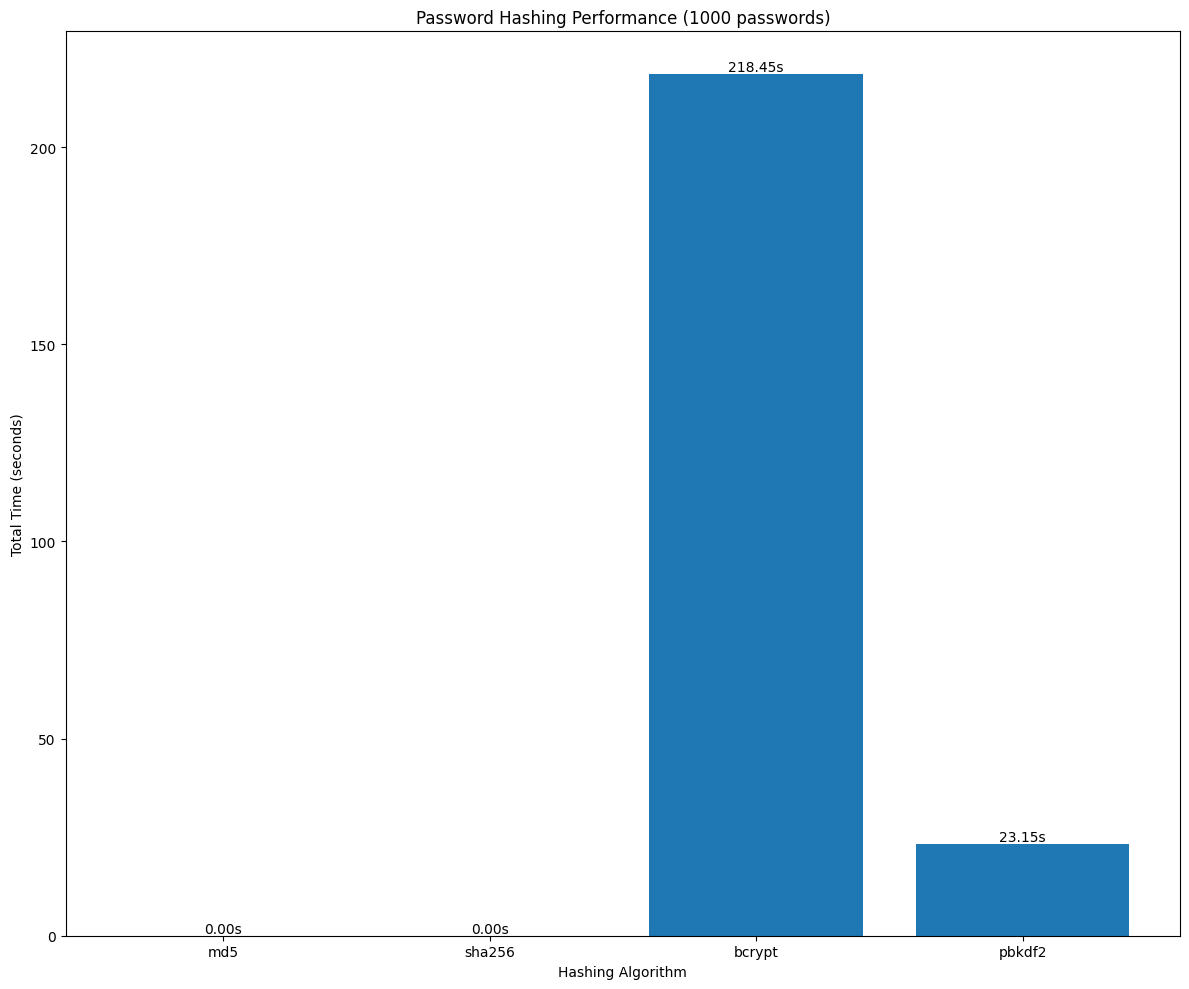

In [9]:
# Run benchmark
algorithms = ['md5', 'sha256', 'bcrypt', 'pbkdf2']
timings = {algo: benchmark_hashing(algo) for algo in algorithms}

# Create DataFrame
df = pd.DataFrame(list(timings.items()), columns=['Algorithm', 'Time (s)'])

# Plot
plt.figure(figsize=(12, 10))
bars = plt.bar(df['Algorithm'], df['Time (s)'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}s',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Password Hashing Performance (1000 passwords)")
plt.ylabel("Total Time (seconds)")
plt.xlabel("Hashing Algorithm")
plt.tight_layout()
plt.show()

### Observations

- **bcrypt is significantly slower**, taking approximately 218 seconds to hash 1000 passwords, making it the most secure but computationally expensive option.  
- **PBKDF2 is much faster than bcrypt**, clocking in at around 23 seconds, yet still provides strong resistance to brute-force attacks due to its iterative nature.  
- **MD5 and SHA-256 are extremely fast**, both completing the task in effectively 0 seconds, highlighting their unsuitability for password hashing due to low computational cost.  
- **The wide performance gap** between hashing algorithms emphasizes the trade-off between security and speed, bcrypt and PBKDF2 are preferred for secure storage despite higher processing time.

### Verify plain text password with Hashes in DB

- This function verifies a user's password by fetching the stored bcrypt hash from the database using their email.  
- It compares the provided plain password with the stored hash using `bcrypt.checkpw()`.  
- A success or failure message is printed based on the verification result.

In [10]:
def verify_password(email, plain_password):
    # Connect to DB
    conn = sqlite3.connect('users.db')
    cursor = conn.cursor()
    # Fetch bcrypt hash for the given email
    cursor.execute("SELECT hash_bcrypt FROM users WHERE email = ?", (email,))
    result = cursor.fetchone()
    conn.close()
    if result is None:
        print("❌ No user found with this email.")
        return False
    stored_hash = result[0]
    # Verify password
    if bcrypt.checkpw(plain_password.encode(), stored_hash.encode()):
        print("✅ Password correct!")
    else:
        print("❌ Incorrect password.")

Copy a combination of `email` and `plain_password` from head of `users.db` printed above.

In [13]:
# Grab a real email from your DB or use one you know is stored
verify_password("donaldgarcia@example.net", 'oAF=?Y>P*NY|xDf"')

✅ Password correct!


### Simple WebApp

Copy a combination of `email` and `plain_password` from head of `users.db` printed above.

In [14]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.0.0.36:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
^C
  Stopping...
Exception ignored on threading shutdown:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/threading.py", line 1534, in _shutdown
    atexit_call()
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/threading.py", line 1505, in <lambda>
    _threading_atexits.append(lambda: func(*arg, **kwargs))
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/concurrent/futures/thread.py", line 31, in _python_exit
    t.join()
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/threading.py

### Webapp UI

<p align="center">
  <img width="900" height="" src="webapp.png">
</p>

---

<h1 align="center">References</h1>

### MD5
- **Algorithm specification (RFC 1321)**  
  The original MD5 message‐digest algorithm, defined by Rivest in 1992.  
  https://www.ietf.org/rfc/rfc1321.txt

- **Python `hashlib` docs**  
  Usage of `hashlib.md5()` and its parameters.  
  https://docs.python.org/3/library/hashlib.html#md5

- **Security considerations**  
  MD5 is **not** collision‑resistant and is **deprecated** for password hashing.  
  OWASP: MD5 weaknesses and migration guidance.  
  https://cheatsheetseries.owasp.org/cheatsheets/Hashing_Cheat_Sheet.html#md5


### SHA‑256
- **FIPS PUB 180‑4 (Secure Hash Standard)**  
  Federal standard defining SHA‑1, SHA‑2 (including SHA‑256).  
  https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf

- **IETF RFC 6234**  
  Supplementary RFC covering SHA‑2 algorithms.  
  https://www.ietf.org/rfc/rfc6234.txt

- **Python `hashlib` docs**  
  Usage of `hashlib.sha256()`.  
  https://docs.python.org/3/library/hashlib.html#hashlib.sha256


### bcrypt
- **Original paper**  
  Provos & Mazières, “A Future‐Adaptable Password Scheme” (1999).  
  https://www.usenix.org/legacy/events/usenix99/provos/provos.pdf

- **OpenBSD implementation details**  
  The canonical reference implementation in OpenBSD’s source tree.  
  https://cvsweb.openbsd.org/src/lib/libc/crypt/bcrypt.c

- **Python `bcrypt` library docs**  
  PyPI package page and usage examples.  
  https://pypi.org/project/bcrypt/  
  https://bcrypt.readthedocs.io/en/latest/


### PBKDF2‑HMAC‑SHA256
- **PKCS #5 v2.0 / RFC 2898**  
  Defines PBKDF2 with any pseudorandom function (e.g., HMAC‐SHA256).  
  https://www.ietf.org/rfc/rfc2898.txt

- **NIST SP 800‑132**  
  Guidelines for using PBKDF2 and other derivation functions for password‑based key derivation.  
  https://csrc.nist.gov/publications/detail/sp/800-132/final

- **Python `hashlib` docs**  
  Usage of `hashlib.pbkdf2_hmac()`, including parameters for salt and iteration count.  
  https://docs.python.org/3/library/hashlib.html#hashlib.pbkdf2_hmac